# **Zad1**

Współczynnik kierunkowy (a): 2.979
Wyraz wolny (b): 5.358
Współczynnik korelacji Pearsona r: 0.986
Wartość p: 0.000
Błąd standardowy: 0.016


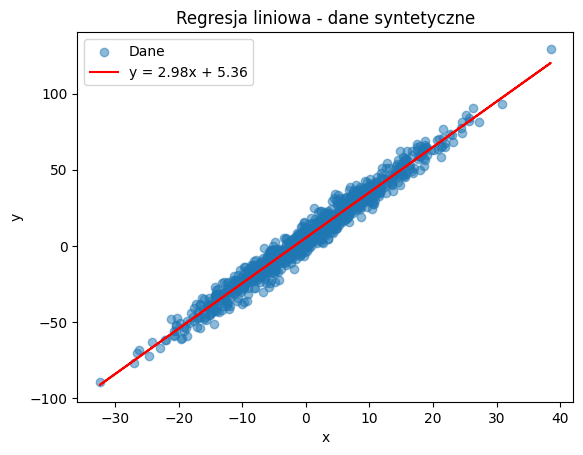

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import files
import pandas as pd
np.random.seed(42)

x = np.random.normal(0, 10, 1000)
y = 3 * x + 5 + np.random.normal(0, 5, 1000)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Współczynnik kierunkowy (a): {slope:.3f}")
print(f"Wyraz wolny (b): {intercept:.3f}")
print(f"Współczynnik korelacji Pearsona r: {r_value:.3f}")
print(f"Wartość p: {p_value:.3f}")
print(f"Błąd standardowy: {std_err:.3f}")

plt.scatter(x, y, alpha=0.5, label='Dane')
plt.plot(x, slope * x + intercept, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.title("Regresja liniowa - dane syntetyczne")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


# **Zad2**

Saving LungDisease.csv to LungDisease.csv
   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1


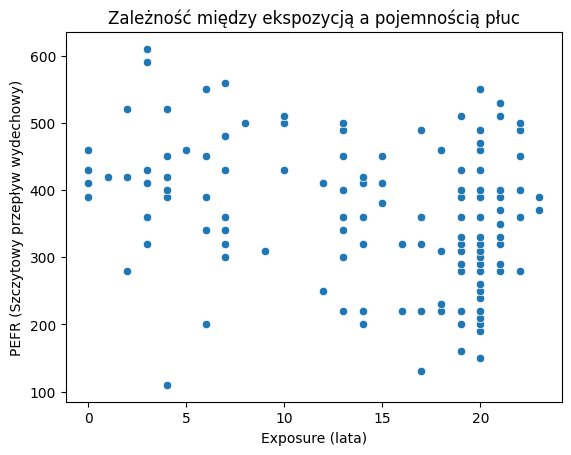

Współczynnik korelacji Pearsona: r = -0.277, p-value = 2.008e-03
Współczynnik kierunkowy (a): -4.185
Wyraz wolny (b): 424.583


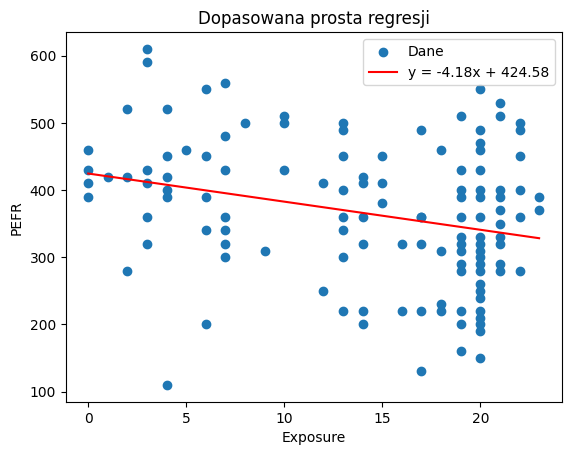

In [3]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
uploaded = files.upload()
df = pd.read_csv("LungDisease.csv")

print(df.head())

sns.scatterplot(data=df, x='Exposure', y='PEFR')
plt.title("Zależność między ekspozycją a pojemnością płuc")
plt.xlabel("Exposure (lata)")
plt.ylabel("PEFR (Szczytowy przepływ wydechowy)")
plt.show()

r, p_value = pearsonr(df['Exposure'], df['PEFR'])
print(f"Współczynnik korelacji Pearsona: r = {r:.3f}, p-value = {p_value:.3e}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Exposure'], df['PEFR'])
print(f"Współczynnik kierunkowy (a): {slope:.3f}")
print(f"Wyraz wolny (b): {intercept:.3f}")
plt.scatter(df['Exposure'], df['PEFR'], label="Dane")
plt.plot(df['Exposure'], slope * df['Exposure'] + intercept, color='red',
         label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.title("Dopasowana prosta regresji")
plt.xlabel("Exposure")
plt.ylabel("PEFR")
plt.legend()
plt.show()



# **Zad3**

Saving anscombe.csv to anscombe (1).csv
     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47 



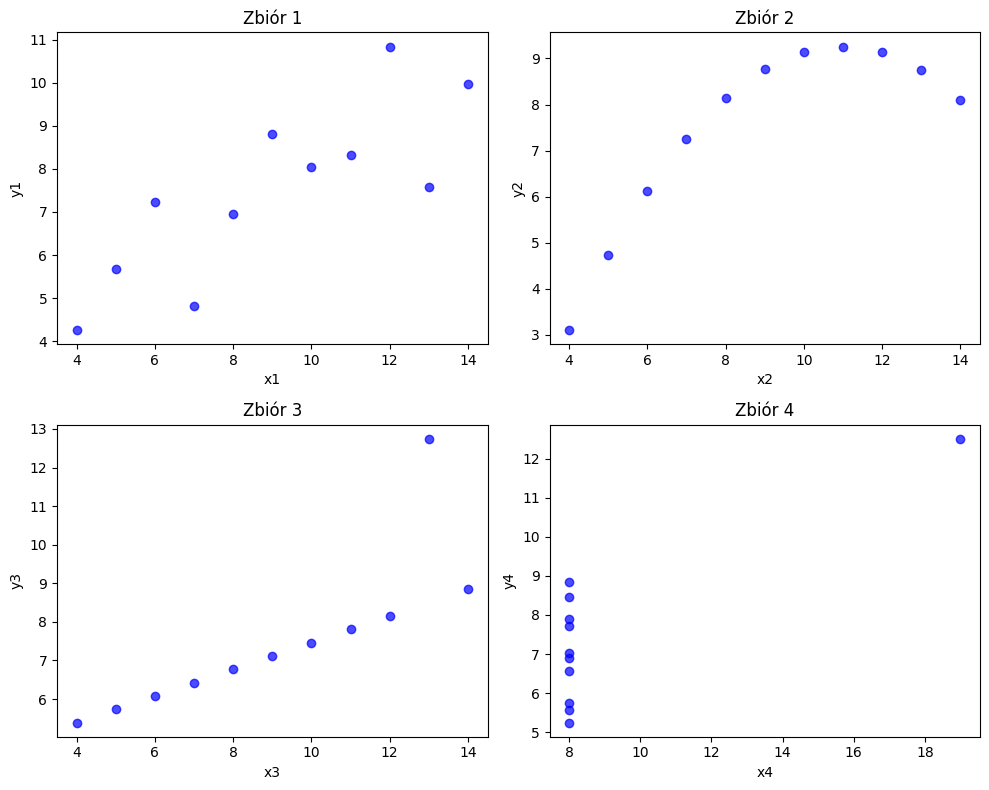

📊 Wyniki regresji i korelacji:
         a (nachylenie)  b (przecięcie)  błąd std  r (korelacja)
Zbiór 1        0.500091        3.000091  0.117906       0.816421
Zbiór 2        0.500000        3.000909  0.117964       0.816237
Zbiór 3        0.499727        3.002455  0.117878       0.816287
Zbiór 4        0.499909        3.001727  0.117819       0.816521 



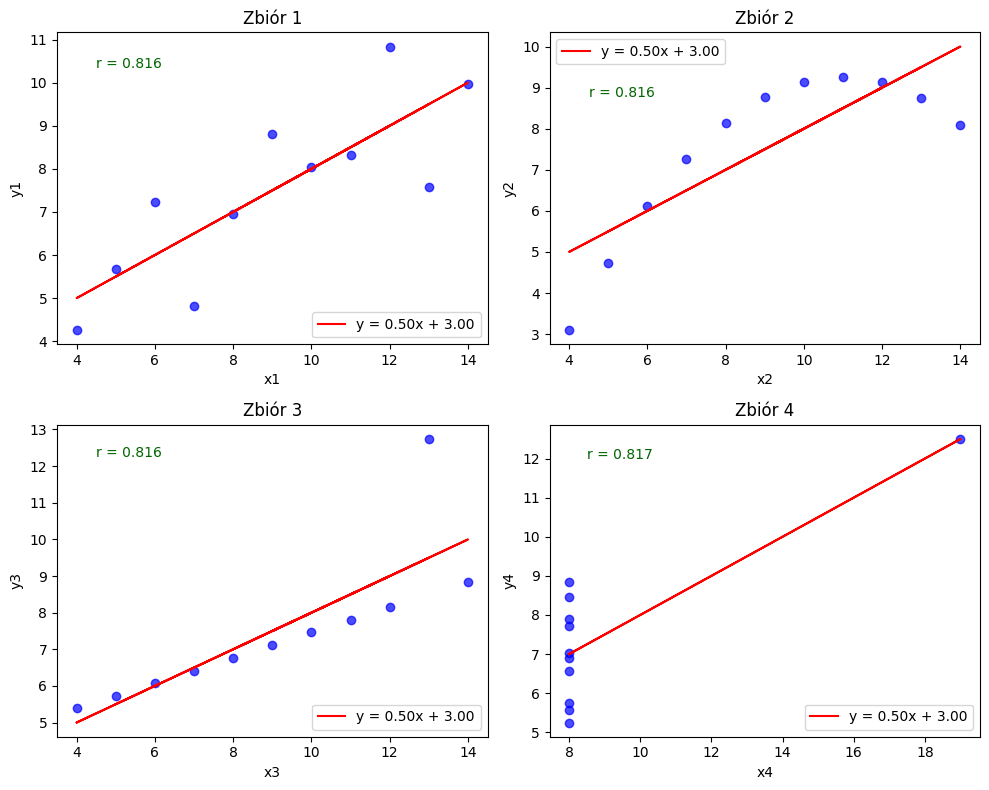

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Wczytanie danych
uploaded = files.upload()
df = pd.read_csv("anscombe.csv", header=[0, 1])

df.columns = [f"{col[1]}{int(col[0])+1}" for col in df.columns]

print(df.head(), "\n")

#Wykresy punktowe
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i in range(4):
    x = df[f"x{i+1}"]
    y = df[f"y{i+1}"]
    axes[i].scatter(x, y, color='blue', alpha=0.7)
    axes[i].set_title(f"Zbiór {i+1}")
    axes[i].set_xlabel(f"x{i+1}")
    axes[i].set_ylabel(f"y{i+1}")

plt.tight_layout()
plt.show()

#Dopasowanie funkcji liniowych
results = {}

for i in range(4):
    x = df[f"x{i+1}"]
    y = df[f"y{i+1}"]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    results[f"Zbiór {i+1}"] = {
        "a (nachylenie)": slope,
        "b (przecięcie)": intercept,
        "błąd std": std_err,
        "r (korelacja)": r_value
    }

#Wyświetlenie wyników
results_df = pd.DataFrame(results).T
print("Wyniki regresji i korelacji:")
print(results_df, "\n")

#Wykresy z liniami regresji
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i in range(4):
    x = df[f"x{i+1}"]
    y = df[f"y{i+1}"]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    axes[i].scatter(x, y, color='blue', alpha=0.7)

    # linia regresji
    axes[i].plot(x, slope*x + intercept, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

    # adnotacja z korelacją
    axes[i].text(min(x)+0.5, max(y)-0.5, f"r = {r_value:.3f}", color='darkgreen')

    axes[i].legend()
    axes[i].set_title(f"Zbiór {i+1}")
    axes[i].set_xlabel(f"x{i+1}")
    axes[i].set_ylabel(f"y{i+1}")

plt.tight_layout()
plt.show()
